# Institutional Factors

How do school type and teacher quality modify the impact of individual study habits and attendance on exam score, and how could socio economic factors play a role?

In [7]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('StudentPerformanceFactors (1).csv')

G = nx.Graph()

for idx, row in df.iterrows():
    student_id = f"student_{idx}"
    G.add_node(student_id, 
               hours_studied=row['Hours_Studied'], 
               attendance=row['Attendance'], 
               exam_score=row['Exam_Score'],
               school_type=row['School_Type'],
               teacher_quality=row['Teacher_Quality'],
               family_income=row['Family_Income'],
               parental_education=row['Parental_Education_Level'],
               access_resources=row['Access_to_Resources'])

# Now connect students who share school type, teacher quality, or socioeconomic level
for i in G.nodes():
    for j in G.nodes():
        if i != j:
            if (G.nodes[i]['school_type'] == G.nodes[j]['school_type'] or
                G.nodes[i]['teacher_quality'] == G.nodes[j]['teacher_quality'] or
                G.nodes[i]['family_income'] == G.nodes[j]['family_income']):
                G.add_edge(i, j)


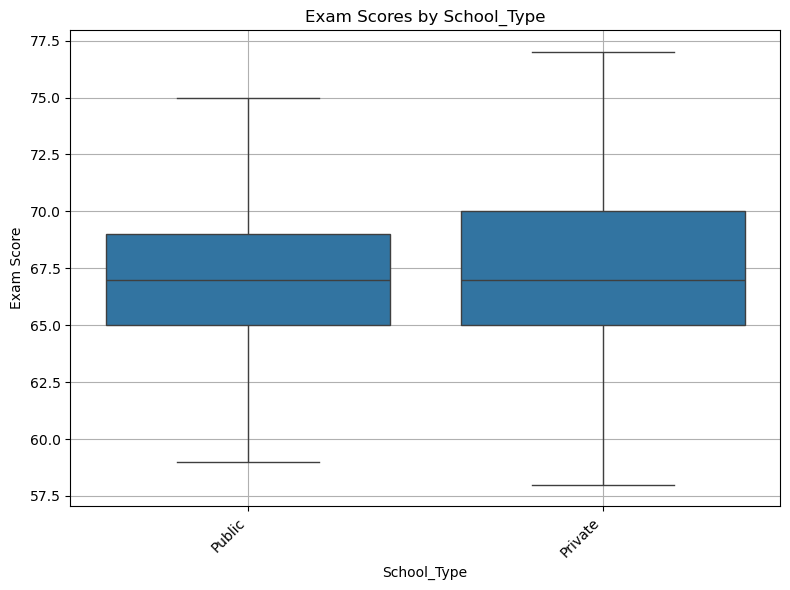

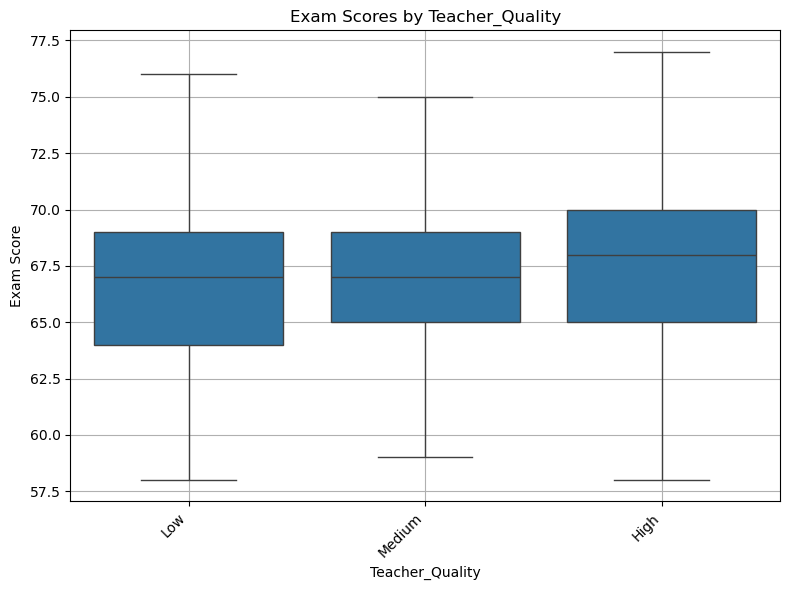

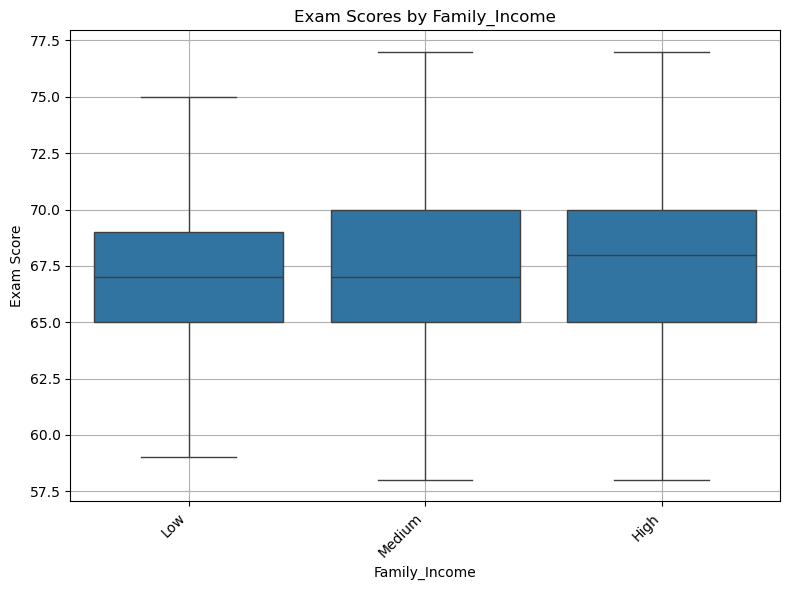

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('StudentPerformanceFactors (1).csv')

institutional_factors = ['School_Type', 'Teacher_Quality', 'Family_Income']

for factor in institutional_factors:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=factor, y='Exam_Score', data=df, order=['Low', 'Medium', 'High'] if factor != 'School_Type' else None, showfliers = False)
    plt.title(f'Exam Scores by {factor}')
    plt.xlabel(factor)
    plt.ylabel('Exam Score')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [8]:
import pandas as pd

df = pd.read_csv('StudentPerformanceFactors (1).csv')

# Optional: Sample a manageable size
# df = df.sample(500, random_state=42)

# Grouping Factors
institutional_factors = ['School_Type', 'Teacher_Quality', 'Family_Income']

for factor in institutional_factors:
    print(f"\n===== Analyzing by {factor} =====")
    groups = df.groupby(factor)

    for group_name, group_data in groups:
        if len(group_data) < 10:
            continue  # Skip tiny groups
        
        # Calculate correlations
        corr_hours = group_data['Hours_Studied'].corr(group_data['Exam_Score'])
        corr_attendance = group_data['Attendance'].corr(group_data['Exam_Score'])

        print(f"Group: {group_name} (n={len(group_data)})")
        print(f"  Correlation (Hours Studied vs Exam Score): {round(corr_hours, 3)}")
        print(f"  Correlation (Attendance vs Exam Score): {round(corr_attendance, 3)}")



===== Analyzing by School_Type =====
Group: Private (n=2009)
  Correlation (Hours Studied vs Exam Score): 0.437
  Correlation (Attendance vs Exam Score): 0.592
Group: Public (n=4598)
  Correlation (Hours Studied vs Exam Score): 0.449
  Correlation (Attendance vs Exam Score): 0.576

===== Analyzing by Teacher_Quality =====
Group: High (n=1947)
  Correlation (Hours Studied vs Exam Score): 0.448
  Correlation (Attendance vs Exam Score): 0.577
Group: Low (n=657)
  Correlation (Hours Studied vs Exam Score): 0.476
  Correlation (Attendance vs Exam Score): 0.603
Group: Medium (n=3925)
  Correlation (Hours Studied vs Exam Score): 0.444
  Correlation (Attendance vs Exam Score): 0.582

===== Analyzing by Family_Income =====
Group: High (n=1269)
  Correlation (Hours Studied vs Exam Score): 0.419
  Correlation (Attendance vs Exam Score): 0.549
Group: Low (n=2672)
  Correlation (Hours Studied vs Exam Score): 0.478
  Correlation (Attendance vs Exam Score): 0.595
Group: Medium (n=2666)
  Correlation

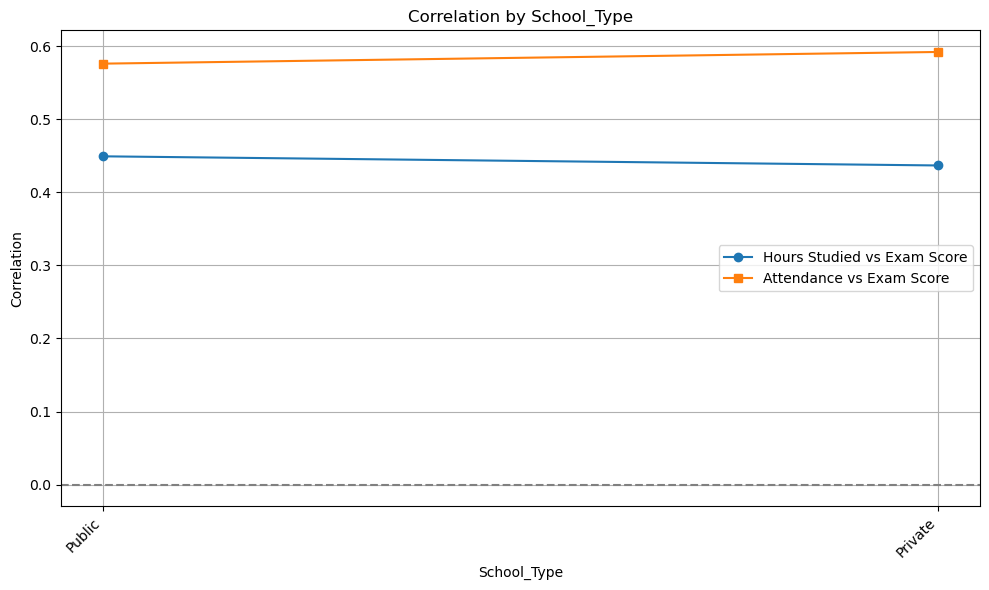

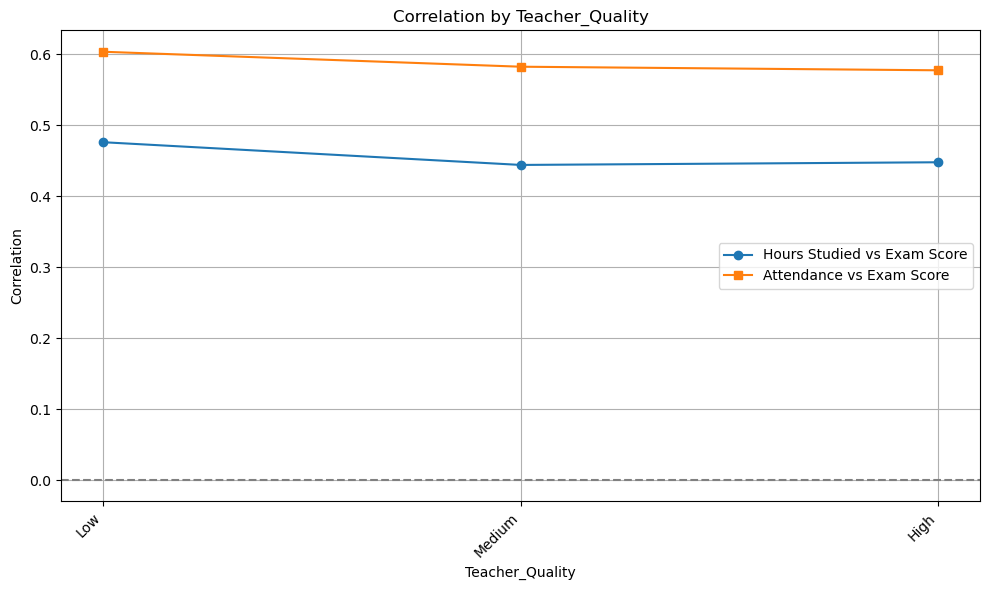

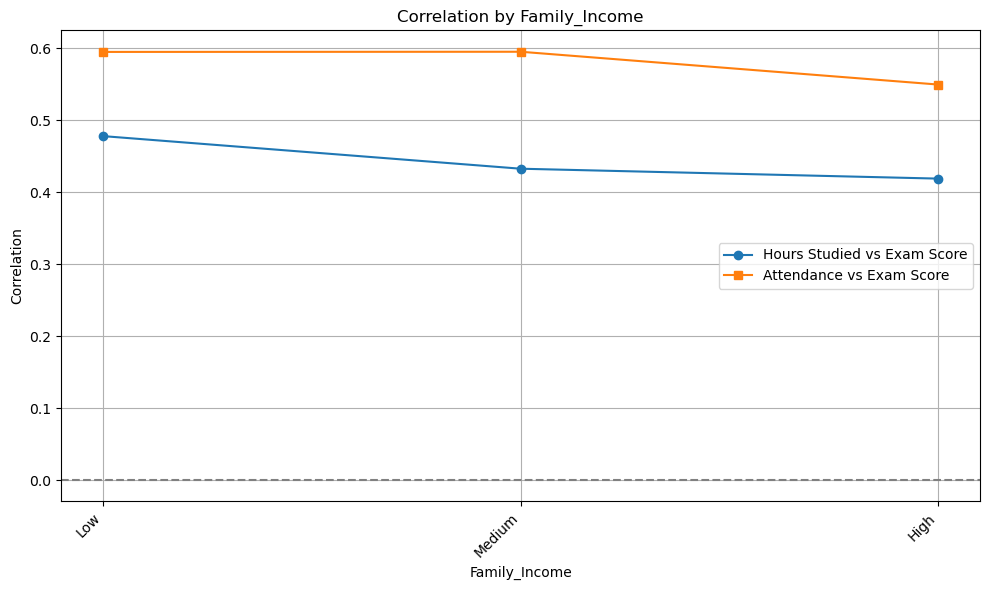

In [11]:
institutional_factors = ['School_Type', 'Teacher_Quality', 'Family_Income']

# Define the logical order for factors that have levels
order_map = {
    'School_Type': ['Public', 'Private', 'Elite'],  # Example, change based on actual data
    'Teacher_Quality': ['Low', 'Medium', 'High'],
    'Family_Income': ['Low', 'Medium', 'High']
}

for factor in institutional_factors:
    groups = df.groupby(factor)

    group_names = []
    hours_corrs = []
    attendance_corrs = []

    for group_name, group_data in groups:
        if len(group_data) < 10:
            continue
        
        corr_hours = group_data['Hours_Studied'].corr(group_data['Exam_Score'])
        corr_attendance = group_data['Attendance'].corr(group_data['Exam_Score'])

        group_names.append(str(group_name))
        hours_corrs.append(corr_hours)
        attendance_corrs.append(corr_attendance)

    # Sort according to desired logical order
    if factor in order_map:
        sorted_groups = order_map[factor]
        zipped = list(zip(group_names, hours_corrs, attendance_corrs))
        zipped_sorted = sorted(zipped, key=lambda x: sorted_groups.index(x[0]) if x[0] in sorted_groups else 999)
        group_names, hours_corrs, attendance_corrs = zip(*zipped_sorted)

    x = range(len(group_names))
    
    plt.figure(figsize=(10,6))
    plt.plot(x, hours_corrs, marker='o', label='Hours Studied vs Exam Score')
    plt.plot(x, attendance_corrs, marker='s', label='Attendance vs Exam Score')
    plt.xticks(x, group_names, rotation=45, ha='right')
    plt.title(f'Correlation by {factor}')
    plt.xlabel(factor)
    plt.ylabel('Correlation')
    plt.axhline(0, color='gray', linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
